In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
table_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/SCENIC_results/'

In [4]:
## read in vivo regulons
invivo = pd.read_csv(table_dir + 'EC_SCENIC_scores_INVIVO_treatment.csv', index_col=0, sep = ';')
invivo['regulon'] = invivo.index
invivo.columns = ['ILD','healthy','regulon']
invivo.head(5)

,ILD,healthy,regulon
,,,
AHR_(+),0.431673,0.447130,AHR_(+)
AR_(+),0.225805,0.241665,AR_(+)
ARID3A_(+),0.464201,0.573746,ARID3A_(+)
ARNT_(+),0.392888,0.455357,ARNT_(+)
ARNTL2_(+),0.360850,0.551355,ARNTL2_(+)


In [5]:
## read in vivo regulons
exvivo = pd.read_csv(table_dir + 'EC_SCENIC_scores_EXVIVO_treatment.csv', index_col=0, sep = ';')
exvivo['regulon'] = exvivo.index
exvivo.columns = ['FC','CC','regulon']
exvivo.head(5)

,FC,CC,regulon
,,,
AHCTF1_(+),0.470790,0.592014,AHCTF1_(+)
AR_(+),0.452629,0.449099,AR_(+)
ARID3A_(+),0.376261,0.537492,ARID3A_(+)
ARNT_(+),0.435306,0.571680,ARNT_(+)
ARNT2_(+),0.208361,0.238639,ARNT2_(+)


### merge tables

In [6]:
invivo['invivo_log2FC'] = np.log2(invivo['ILD']/invivo['healthy'])
exvivo['exvivo_log2FC'] = np.log2(exvivo['FC']/exvivo['CC'])

In [7]:
tab = invivo.merge(exvivo, left_on = 'regulon', right_on = 'regulon')

In [8]:
tab

,ILD,healthy,regulon,invivo_log2FC,FC,CC,exvivo_log2FC
0,0.225805,0.241665,AR_(+),-0.097931,0.452629,0.449099,0.011296
1,0.464201,0.573746,ARID3A_(+),-0.305663,0.376261,0.537492,-0.514510
2,0.392888,0.455357,ARNT_(+),-0.212880,0.435306,0.571680,-0.393178
3,0.449830,0.560337,ATF1_(+),-0.316915,0.385021,0.561421,-0.544146
4,0.452944,0.601778,ATF2_(+),-0.409899,0.462110,0.596596,-0.368518
...,...,...,...,...,...,...,...
232,0.431454,0.599892,ZNF460_(+),-0.475496,0.476447,0.421100,0.178153
233,0.283351,0.336609,ZNF502_(+),-0.248483,0.479874,0.543734,-0.180245
234,0.299965,0.413276,ZNF66_(+),-0.462311,0.442116,0.515710,-0.222135
235,0.420575,0.497142,ZNF691_(+),-0.241295,0.437202,0.480953,-0.137596


In [9]:
conserved = tab[((tab['invivo_log2FC'] > 0) & (tab['exvivo_log2FC'] > 0)) | ((tab['invivo_log2FC'] < 0) & (tab['exvivo_log2FC'] < 0))]

In [10]:
conserved = conserved.set_index('regulon')

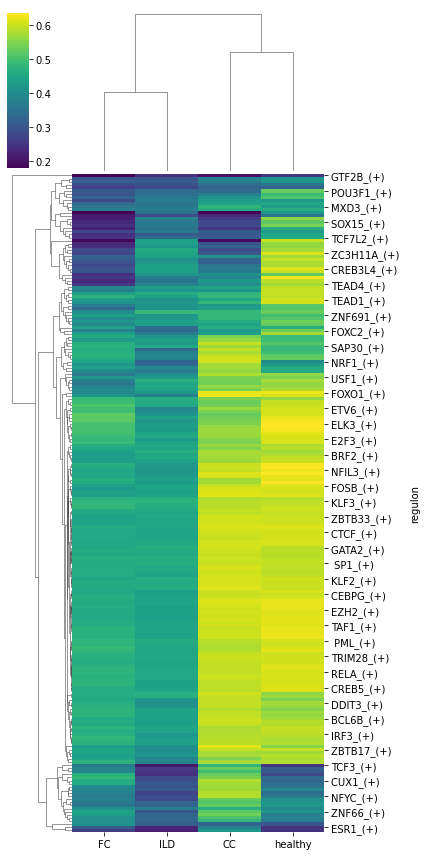

In [11]:
sb.clustermap(conserved[['CC','FC','healthy','ILD']], cmap = 'viridis', figsize = (6,12))

In [12]:
top25_invivo = tab.sort_values(by = 'ILD', ascending = False).head(50)['regulon'].to_list()
bottom25_invivo = tab.sort_values(by = 'healthy', ascending = True).tail(40)['regulon'].to_list()

In [13]:
top25_exvivo = tab.sort_values(by = 'FC', ascending = False).head(50)['regulon'].to_list()
bottom25_exvivo = tab.sort_values(by = 'CC', ascending = True).tail(40)['regulon'].to_list()

In [14]:
top_induced = np.intersect1d(top25_invivo, top25_exvivo)
top_healthy = np.intersect1d(bottom25_invivo, bottom25_exvivo)

In [15]:
induced_tab = tab[tab['regulon'].isin(top_induced)][['regulon','ILD','FC']]
induced_tab

,regulon,ILD,FC
22,CREB1_(+),0.457867,0.492087
39,ELF4_(+),0.450168,0.486841
68,FOXN3_(+),0.460449,0.485466
111,KLF3_(+),0.472279,0.474860
120,MEF2A_(+),0.450997,0.525283
148,PML_(+),0.457035,0.477556
155,RAD21_(+),0.462966,0.479280
161,RELA_(+),0.453713,0.473565
163,REST_(+),0.453526,0.484638
170,SAP30_(+),0.453777,0.470306


In [16]:
induced_tab_invivo = induced_tab[['regulon','ILD']]
induced_tab_invivo.rename(columns = {'ILD':'RSS'}, inplace = True)
induced_tab_invivo['condition'] = 'invivo - IPF'
induced_tab_invivo = induced_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
induced_tab_exvivo = induced_tab[['regulon','FC']]
induced_tab_exvivo.rename(columns = {'FC':'RSS'}, inplace = True)
induced_tab_exvivo['condition'] = 'exvivo - FC'

In [18]:
conserved_induced = pd.concat([induced_tab_invivo, induced_tab_exvivo], axis=0)

In [19]:
conserved_induced

,regulon,RSS,condition
111,KLF3_(+),0.472279,invivo - IPF
188,STAT1_(+),0.463360,invivo - IPF
155,RAD21_(+),0.462966,invivo - IPF
68,FOXN3_(+),0.460449,invivo - IPF
22,CREB1_(+),0.457867,invivo - IPF
148,PML_(+),0.457035,invivo - IPF
170,SAP30_(+),0.453777,invivo - IPF
161,RELA_(+),0.453713,invivo - IPF
163,REST_(+),0.453526,invivo - IPF
190,SUPT20H_(+),0.452603,invivo - IPF


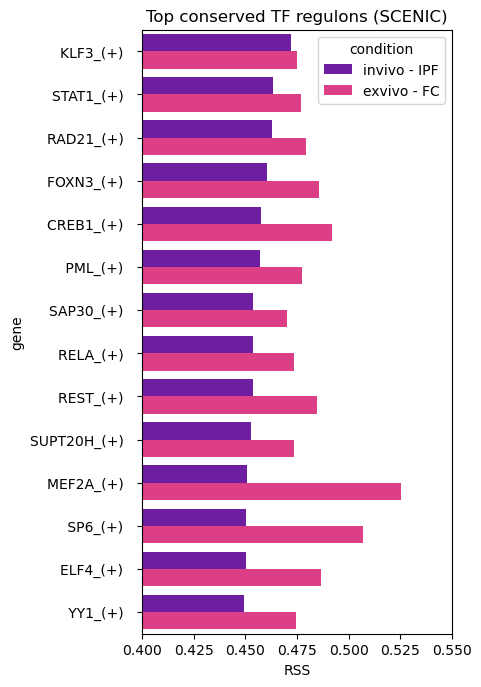

In [20]:
sb.barplot(data = conserved_induced,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.4, 0.55)
               )
plt.savefig(fig_dir + 'barplot_vascularEC_conserved_TF_regulons_IPF.pdf')
plt.show()

In [21]:
bottom_tab = tab[tab['regulon'].isin(top_healthy)][['regulon','healthy','CC']]
bottom_tab

,regulon,healthy,CC
5,ATF3_(+),0.620317,0.600278
6,ATF4_(+),0.610614,0.604241
37,ELF1_(+),0.617413,0.600960
54,EZH2_(+),0.617463,0.602602
58,FOSL1_(+),0.631717,0.611313
69,FOXO1_(+),0.621373,0.618319
102,JUND_(+),0.617689,0.610445
112,KLF6_(+),0.622221,0.600346
116,MAFF_(+),0.619332,0.603974
125,MXI1_(+),0.610135,0.609439


In [22]:
bottom_tab_invivo = bottom_tab[['regulon','healthy']]
bottom_tab_invivo.rename(columns = {'healthy':'RSS'}, inplace = True)
bottom_tab_invivo['condition'] = 'invivo - healthy'
bottom_tab_invivo = bottom_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [23]:
bottom_tab_exvivo = bottom_tab[['regulon','CC']]
bottom_tab_exvivo.rename(columns = {'CC':'RSS'}, inplace = True)
bottom_tab_exvivo['condition'] = 'exvivo - CC'

In [24]:
conserved_repressed = pd.concat([bottom_tab_invivo, bottom_tab_exvivo], axis=0)

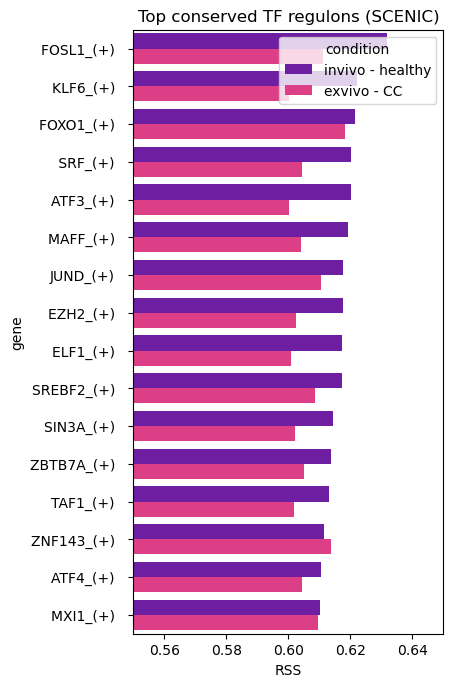

In [25]:
sb.barplot(data = conserved_repressed,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.55,0.65)
               )
plt.savefig(fig_dir + 'barplot_vsacularEC_conserved_TF_regulons_healthy.pdf')
plt.show()

### Visualize both plots in one 

In [26]:
conserved_repressed['RSS'] = conserved_repressed['RSS']*(-1)

In [27]:
conserved = pd.concat([conserved_induced, conserved_repressed], axis=0)
#conserved

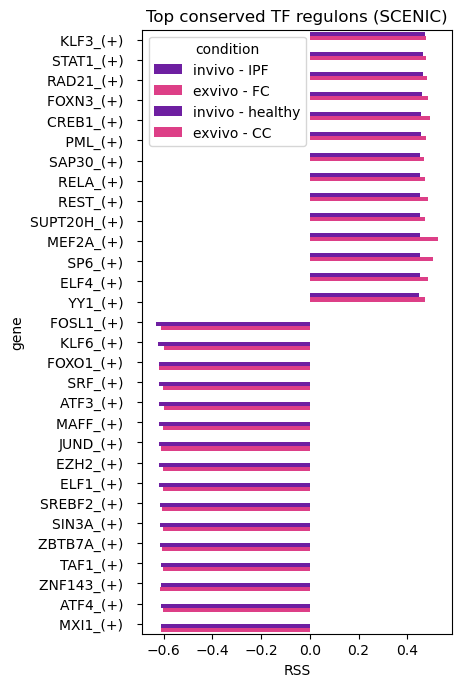

In [28]:
sb.barplot(data = conserved,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene'
               )
#plt.savefig(fig_dir + 'barplot_fibroblasts_conserved_TF_regulons_healthy.pdf')
plt.show()